In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string


In [13]:
df = pd.read_csv('./archive/TelevisionNews/CNN.202001.csv')

In [16]:
df2 = pd.read_csv('./archive/TelevisionNews/MSNBC.202001.csv')

In [17]:
df3 = pd.read_csv('./archive/TelevisionNews/FOXNEWS.202001.csv')

In [18]:
df4 = pd.read_csv('./archive/TelevisionNews/BBCNEWS.202001.csv')

In [19]:
df = df.append(df2, ignore_index=True)


/tmp/ipykernel_5747/445450659.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [20]:
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)

/tmp/ipykernel_5747/3614181636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3, ignore_index=True)
/tmp/ipykernel_5747/3614181636.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4, ignore_index=True)


In [22]:
df

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/CNNW_20200108_1700...,1/8/2020 17:58:03,CNN,Inside Politics,CNNW_20200108_170000_Inside_Politics,https://archive.org/download/CNNW_20200108_170...,everywhere is going to get touched by climate ...
1,https://archive.org/details/CNNW_20200111_1900...,1/11/2020 19:36:46,CNN,CNN Newsroom With Fredricka Whitfield,CNNW_20200111_190000_CNN_Newsroom_With_Fredric...,https://archive.org/download/CNNW_20200111_190...,everywhere is going to get touched by climate ...
2,https://archive.org/details/CNNW_20200118_1200...,1/18/2020 12:51:58,CNN,New Day Weekend With Victor Blackwell and Chri...,CNNW_20200118_120000_New_Day_Weekend_With_Vict...,https://archive.org/download/CNNW_20200118_120...,everywhere is going to get touched by climate ...
3,https://archive.org/details/CNNW_20200106_0700...,1/6/2020 7:52:32,CNN,CNN Newsroom Live,CNNW_20200106_070000_CNN_Newsroom_Live,https://archive.org/download/CNNW_20200106_070...,always said there was global warming. what he ...
4,https://archive.org/details/CNNW_20200118_2200...,1/18/2020 22:39:43,CNN,CNN Newsroom With Ana Cabrera,CNNW_20200118_220000_CNN_Newsroom_With_Ana_Cab...,https://archive.org/download/CNNW_20200118_220...,this melting pot of impacted species. everywhe...
...,...,...,...,...,...,...,...
1848,https://archive.org/details/BBCNEWS_20200103_0...,1/3/2020 1:32:36,BBCNEWS,Asia Business Report,BBCNEWS_20200103_013000_Asia_Business_Report,https://archive.org/download/BBCNEWS_20200103_...,risk of bushfire season such as this one but h...
1849,https://archive.org/details/BBCNEWS_20200114_0...,1/14/2020 0:52:14,BBCNEWS,HARDtalk,BBCNEWS_20200114_003000_HARDtalk,https://archive.org/download/BBCNEWS_20200114_...,"at the royal academy, with the seawater, an ex..."
1850,https://archive.org/details/BBCNEWS_20200117_1...,1/17/2020 11:31:45,BBCNEWS,BBC Newsroom Live,BBCNEWS_20200117_110000_BBC_Newsroom_Live,https://archive.org/download/BBCNEWS_20200117_...,activists outside aberdeen yesterday. still re...
1851,https://archive.org/details/BBCNEWS_20200116_0...,1/16/2020 5:17:15,BBCNEWS,The Briefing,BBCNEWS_20200116_050000_The_Briefing,https://archive.org/download/BBCNEWS_20200116_...,theice is new research says the melting of the...


In [34]:
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Snippet'] = df['Snippet'].apply(preprocess_text)

In [45]:
text = " ".join(snippet for snippet in df['Snippet'])
wordcloud = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(text)


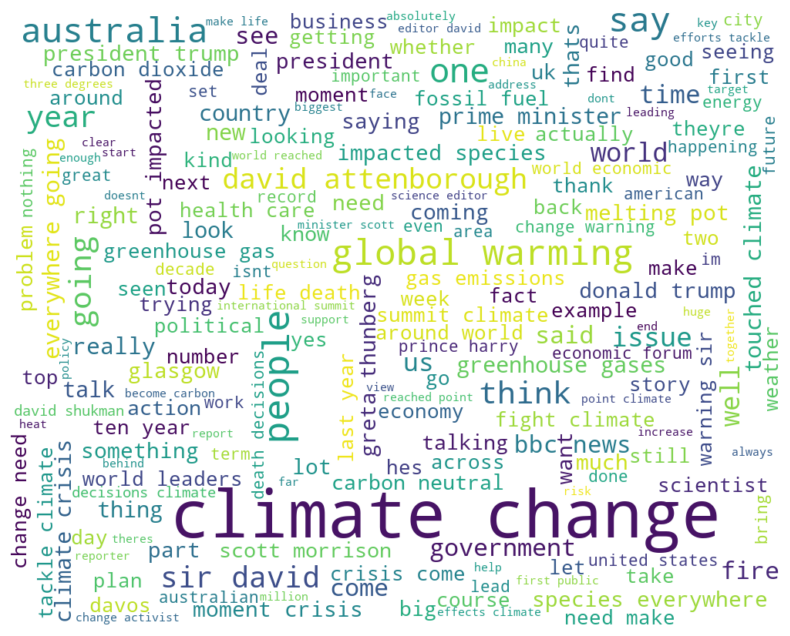

In [46]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


2017

In [47]:
df2017 = pd.read_csv('./archive/TelevisionNews/CNN.201712.csv')
df20172 = pd.read_csv('./archive/TelevisionNews/MSNBC.201712.csv')
df20173 = pd.read_csv('./archive/TelevisionNews/FOXNEWS.201712.csv')
df20174 = pd.read_csv('./archive/TelevisionNews/BBCNEWS.201712.csv')

In [48]:
df2017 = df2017.append(df20172, ignore_index=True)
df2017 = df2017.append(df20173, ignore_index=True)
df2017 = df2017.append(df20174, ignore_index=True)


/tmp/ipykernel_5747/2287088982.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2017 = df2017.append(df20172, ignore_index=True)
/tmp/ipykernel_5747/2287088982.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2017 = df2017.append(df20173, ignore_index=True)
/tmp/ipykernel_5747/2287088982.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2017 = df2017.append(df20174, ignore_index=True)


In [20]:
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df2017['Snippet'] = df2017['Snippet'].apply(preprocess_text)

In [50]:
text = " ".join(snippet for snippet in df2017['Snippet'])
wordcloud2017 = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(text)

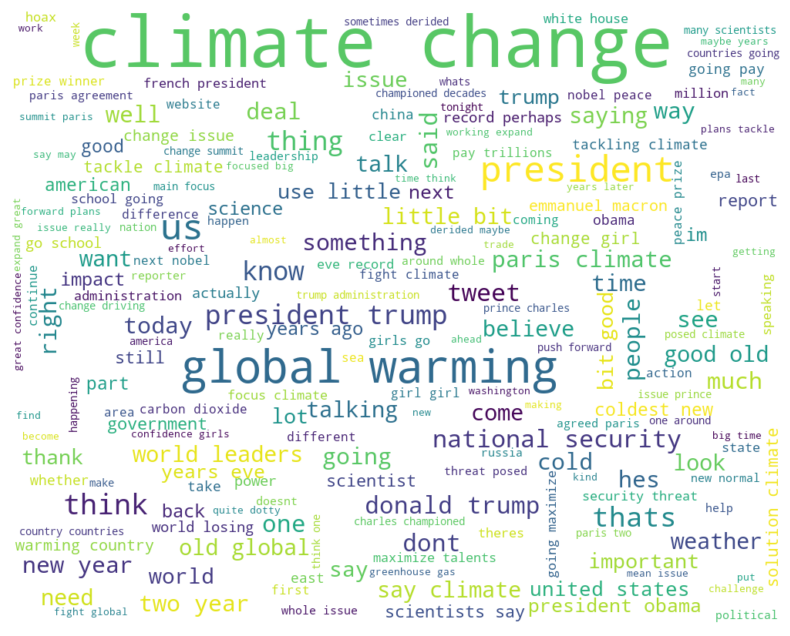

In [51]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud2017, interpolation="bilinear")
plt.axis("off")
plt.show()

2018

In [52]:
df2018 = pd.read_csv('./archive/TelevisionNews/CNN.201812.csv')
df20182 = pd.read_csv('./archive/TelevisionNews/MSNBC.201812.csv')
df20183 = pd.read_csv('./archive/TelevisionNews/FOXNEWS.201812.csv')
df20184 = pd.read_csv('./archive/TelevisionNews/BBCNEWS.201812.csv')

In [53]:
df2018 = df2018.append(df20182, ignore_index=True)
df2018 = df2018.append(df20183, ignore_index=True)
df2018 = df2018.append(df20184, ignore_index=True)

/tmp/ipykernel_5747/4010685070.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2018 = df2018.append(df20182, ignore_index=True)
/tmp/ipykernel_5747/4010685070.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2018 = df2018.append(df20183, ignore_index=True)
/tmp/ipykernel_5747/4010685070.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2018 = df2018.append(df20184, ignore_index=True)


In [54]:
df2018['Snippet'] = df2018['Snippet'].apply(preprocess_text)

In [55]:
text = " ".join(snippet for snippet in df2018['Snippet'])
wordcloud2018 = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(text)

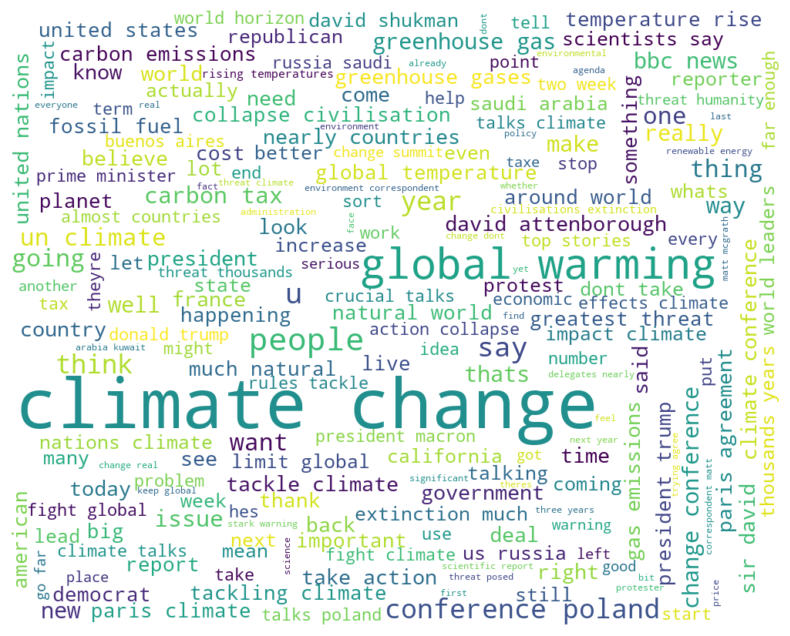

In [62]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud2018, interpolation="bilinear")
plt.axis("off")
plt.show()

2019

In [16]:
df2019 = pd.read_csv('./archive/TelevisionNews/CNN.201912.csv')
df20192 = pd.read_csv('./archive/TelevisionNews/MSNBC.201912.csv')
df20193 = pd.read_csv('./archive/TelevisionNews/FOXNEWS.201912.csv')
df20194 = pd.read_csv('./archive/TelevisionNews/BBCNEWS.201912.csv')

In [17]:
df2019 = df2019.append(df20192, ignore_index=True)
df2019 = df2019.append(df20193, ignore_index=True)
df2019 = df2019.append(df20194, ignore_index=True)

/tmp/ipykernel_9658/1369208766.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2019 = df2019.append(df20192, ignore_index=True)
/tmp/ipykernel_9658/1369208766.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2019 = df2019.append(df20193, ignore_index=True)
/tmp/ipykernel_9658/1369208766.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2019 = df2019.append(df20194, ignore_index=True)


In [21]:
df2019['Snippet'] = df2019['Snippet'].apply(preprocess_text)

In [61]:
text = " ".join(snippet for snippet in df2019['Snippet'])
wordcloud2019 = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(text)

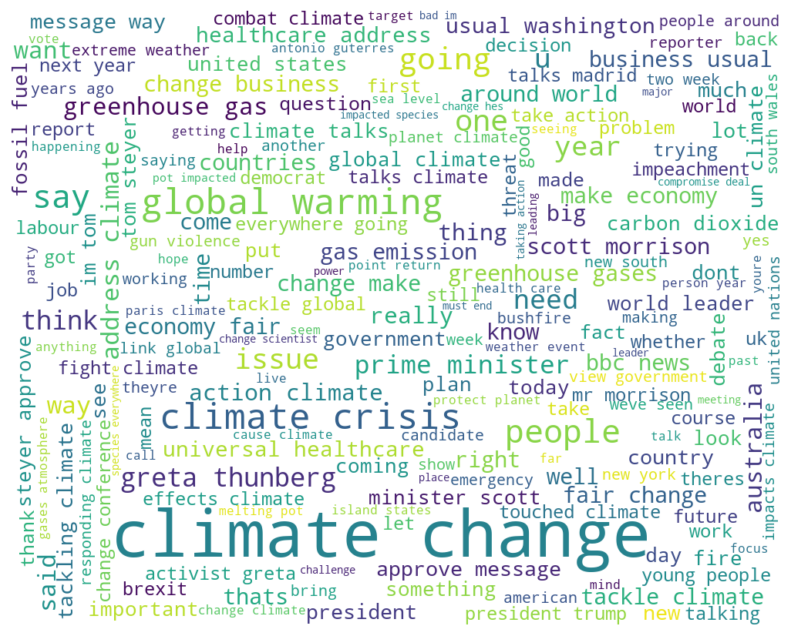

In [63]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud2019, interpolation="bilinear")
plt.axis("off")
plt.show()

#### word frequency 2019

In [8]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
df2019['Snippet'] = df2019['Snippet'].apply(preprocess_text)

In [22]:
text = " ".join(df2019['Snippet'])
text = text.lower()

In [23]:
stop_words = set(stopwords.words("english"))

# Tokenize the text
tokens = word_tokenize(text)

# Filter out stop words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate word frequencies for the filtered tokens
freq_dist = FreqDist(filtered_tokens)

# Select the most common words (e.g., top 20)
top_words = freq_dist.most_common(20)

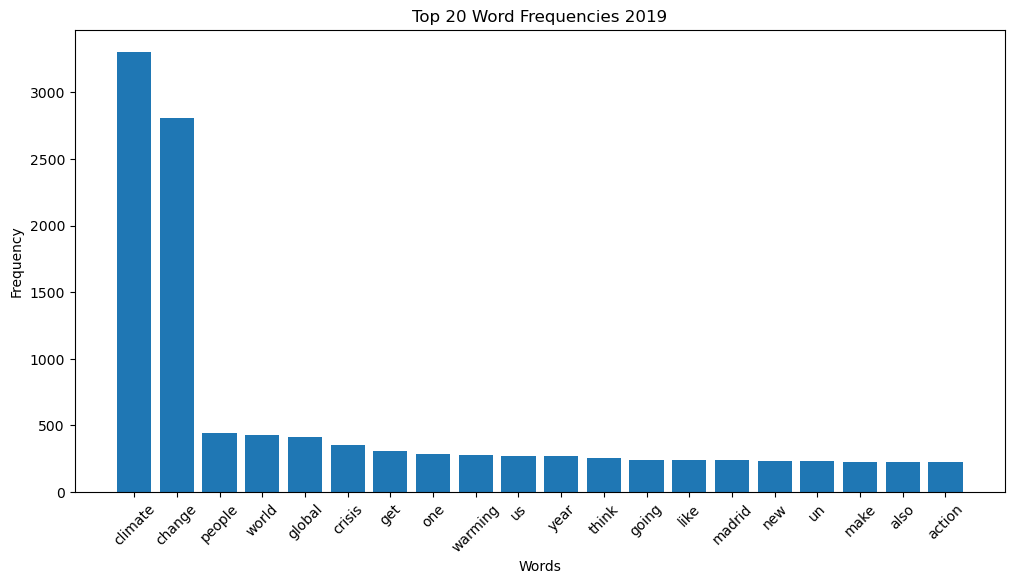

In [24]:
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies 2019")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


#### Rare words 2019

In [25]:
threshold = 5
rare_words = [word for word, count in freq_dist.items() if count < threshold]


In [26]:
print(rare_words)

['mozambique', 'punishing', 'realize', 'historical', 'responsibility', 'signage', 'sounded', 'naturally', 'superior', 'dermatologist', 'skyrizi', 'expose', 'ticks', 'illnesses', 'carry', 'jacqueline', 'absence', 'recognized', 'added', 'hysteria', 'doctor', 'ibrance', 'heads', 'g7', 'theyll', 'theme', 'kansas', 'easily', 'pompeo', 'filing', 'deadline', 'june', 'jane', 'fonda', 'join', 'prolia®', 'strengthen', 'bones', 'groans', 'hmph', 'expenditures', 'floodings', 'tragic', 'wild', 'deny', 'measured', 'innovative', 'prize', 'winners', '2021', '7', 'reinvigorated', 'surrounding', 'recordbreaking', 'wave', 'fueled', 'contained', 'igniting', 'screaming', 'bottom', 'cliff', 'mid30s', 'walking', 'foot', 'path', 'fell', 'minor', 'injuries', 'writing', 'journal', 'tipping', '1941', 'suspend', 'oped', 'cnncom', 'intentionally', 'dangers', 'upcoming', 'organizing', 'fragmented', 'torn', 'partisanship', 'fail', 'ceiling', 'skin', 'bone', 'joint', 'muscle', 'pain', 'forgive', 'pick', 'flights', 'r

In [28]:
text = " ".join(snippet for snippet in rare_words)

wordcloud2019Rare = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(text)

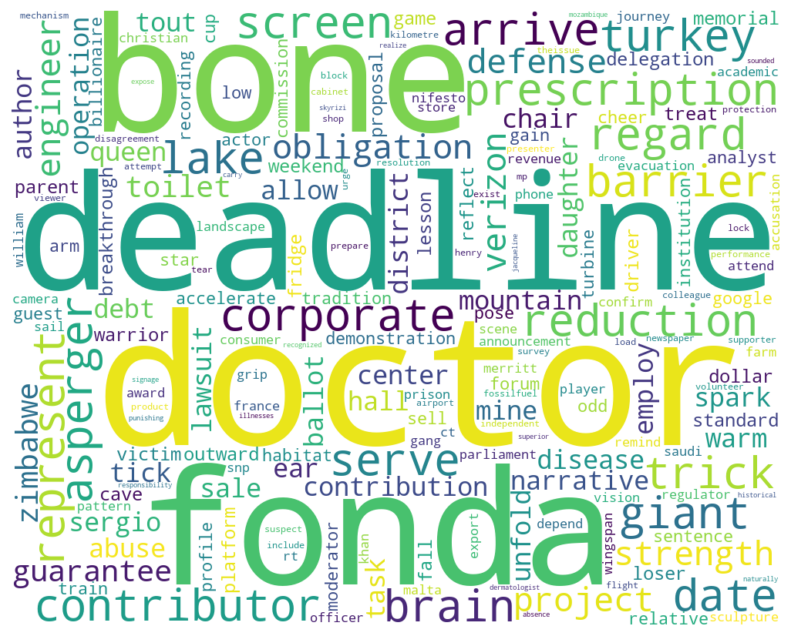

In [29]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud2019Rare, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word embeddings 2019

In [89]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [105]:
# Tokenize your text (you can use the tokens from the previous examples)
#tokens = filtered_tokens  # Replace with your tokenized text

# Train Word2Vec model
model = Word2Vec(filtered_tokens, vector_size=100, window=5, min_count=1, sg=0) 

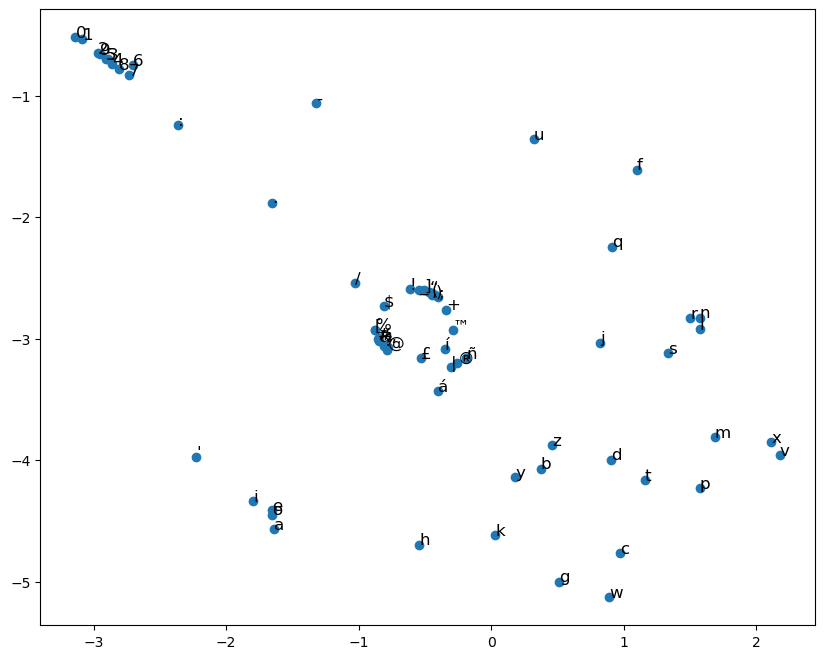

In [106]:
# Extract word vectors from the trained model
word_vectors = model.wv

# Select a subset of words you want to visualize (e.g., top 100 words)
words_to_visualize = list(word_vectors.index_to_key[:100])

# Get the word vectors for the selected words and convert to a NumPy array
vectors = np.array([word_vectors[word] for word in words_to_visualize])

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2D = tsne.fit_transform(vectors)

# Rest of the code remains the same
# Create a scatter plot for visualization
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2D[:, 0], word_vectors_2D[:, 1])

for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(word_vectors_2D[i, 0], word_vectors_2D[i, 1]), size=12)

plt.show()


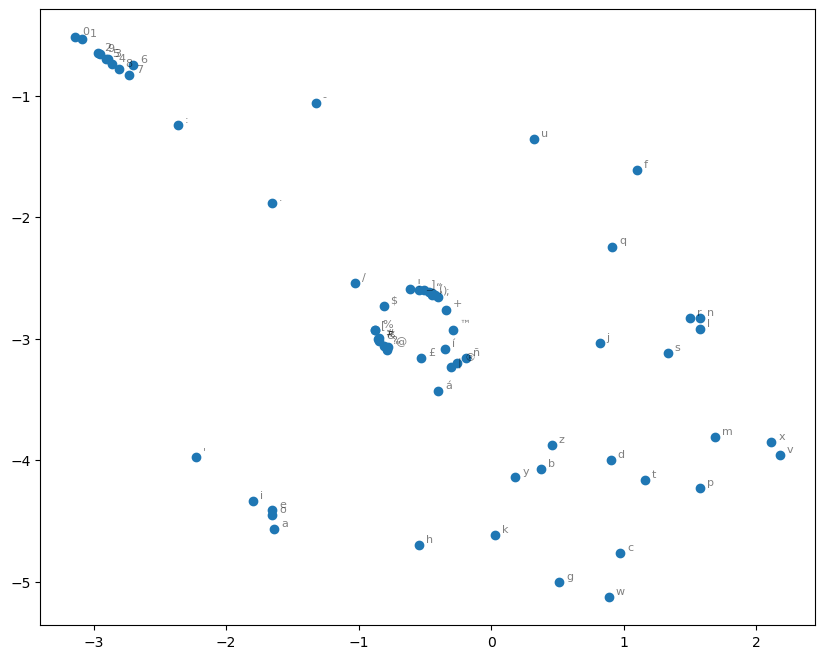

In [107]:
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2D[:, 0], word_vectors_2D[:, 1])

# Label the points with the words, adjusting the size and alignment
for i, word in enumerate(words_to_visualize):
    x, y = word_vectors_2D[i, 0], word_vectors_2D[i, 1]
    plt.annotate(word, (x, y), size=8, alpha=0.5, xytext=(5,2), textcoords='offset points')

plt.show()

In [108]:
for word, vector in zip(words_to_visualize, vectors):
    print(f"Word: {word}, Vector: {vector}")


Word: e, Vector: [-0.32770506  0.13118686  0.19747743  0.09537743 -0.25980407 -0.19098327
  0.03947018  0.48750517 -0.7010952  -0.11140904 -0.06665123  0.12856804
 -0.2972578  -0.2005818   0.01560759 -0.04904353 -0.09238476  0.3865407
 -0.27261856 -0.6041287   0.18889353 -0.14964986  0.1207263  -0.25000122
 -0.09058601 -0.0425745   0.24825047  0.21014303 -0.11306458 -0.08577523
 -0.36577278  0.114652    0.10384681  0.17986298  0.15200368 -0.10012233
  0.16433187 -0.2601312  -0.04158574  0.16870011  0.36955702 -0.06823388
 -0.24015595  0.26669598  0.06341017  0.13091046  0.04257918  0.14596279
  0.22538967 -0.0897248  -0.18450393  0.12123439  0.05025582  0.19466814
 -0.11661995 -0.13986759  0.13498834 -0.35174334 -0.03617875  0.11420705
  0.31643254  0.21902858 -0.09007462 -0.25601798  0.10015666  0.24613728
  0.405625    0.4102104  -0.1779601  -0.05580351 -0.03855928  0.11150585
  0.01920517 -0.10912194 -0.03642078  0.5206805   0.6205979   0.1564067
  0.06116716 -0.29236406  0.04122093